# Problem1

In [1]:
import numpy as np
import pandas as pd

In [2]:
x1,x2,x3=1,1,1

A = np.zeros((10,3))
x_ex = np.ones((3,10))
res = np.zeros((5,5))

res[:,0] = np.array([0,50,100,150,200])

for t0 in (0, 50, 100, 150, 200):
    for i in range(1,11,1):
        ti = t0+i
        bt = x1/ti + x2/ti**2 + x3/ti**3
        
        for j in range(3):
            A[i-1][j] = 1/ti**(j+1)
            
    k2_ATA = np.linalg.cond(np.dot(A.T,A))
    k2_A = np.linalg.cond(A)
        
    x_norm = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), bt)
    
    (Q,R) = np.linalg.qr(A)
    x_orth = np.dot(np.dot(np.linalg.inv(R), Q.T), bt)

    res[int(t0/50)][1] = k2_ATA
    res[int(t0/50)][2] = k2_A
    res[int(t0/50)][3] = np.linalg.norm(x_ex - x_norm)
    res[int(t0/50)][4] = np.linalg.norm(x_ex - x_orth)

In [3]:
df = pd.DataFrame(res, columns=['$t_0$', '$𝜅_2(𝐴^𝑇𝐴)$','$𝜅_2(𝐴)$','||𝑥^{𝑛𝑜𝑟𝑚}-𝑥^{𝑒𝑥}||_2', '||𝑥^{𝑜𝑟𝑡ℎ}-𝑥^{𝑒𝑥}||_2'])
df.set_index('$t_0$')

,$𝜅_2(𝐴^𝑇𝐴)$,$𝜅_2(𝐴)$,||𝑥^{𝑛𝑜𝑟𝑚}-𝑥^{𝑒𝑥}||_2,||𝑥^{𝑜𝑟𝑡ℎ}-𝑥^{𝑒𝑥}||_2
$t_0$,,,,
0.0,2.096205e+03,4.578434e+01,6.109044e+00,6.109044e+00
50.0,1.658990e+12,1.288018e+06,3.815379e+05,3.815379e+05
100.0,2.884738e+14,1.698452e+07,5.192492e+06,5.192492e+06
150.0,6.452086e+15,8.032488e+07,2.482858e+07,2.482858e+07
200.0,6.011692e+16,2.451875e+08,7.621341e+07,7.621341e+07


# Problem3

In [ ]:
for i in range(1,11,1):
    ti = i/5
    bi = 1 + ti + ti**2
    

# Problem4

i

In [1]:
import numpy as np
from scipy.linalg import expm

In [2]:
n=100
h=1/(n+1)
alpha=0.01
beta=1

B=np.zeros((n,n))

B[0][0] = 2*alpha + h*beta
B[0][1] = -alpha
B[0][n-1] = -(alpha+h*beta)
B[n-1][0] = -alpha
B[n-1][n-2] = -(alpha+h*beta)
B[n-1][n-1] = 2*alpha + h*beta

for i in range(1,99,1):
    B[i][i-1] = -(alpha+h*beta)
    B[i][i] = 2*alpha + h*beta
    B[i][i+1] = -alpha
    
B = -h**(-2)*B

In [3]:
x0 = np.zeros(n)
xt = np.identity(n)
ksi_j = np.zeros(n)
t = np.zeros(n)

for j in range(n):
    ksi_j[j] = j*h
    x0[j] = np.exp(-(ksi_j[j]-0.3)**2 / 0.01)
    
for j in range(n):
    t[j] = j * 2/100
    xt[:,j] = np.dot(expm(B*t[j]), x0)

In [4]:
xt

array([[1.23409804e-04, 7.66534694e-05, 6.18628042e-05, ...,
        1.69747410e-01, 1.57553901e-01, 1.46073570e-01],
       [2.21354835e-04, 1.51024285e-04, 1.14045468e-04, ...,
        1.76061073e-01, 1.63644606e-01, 1.51857186e-01],
       [3.89326190e-04, 2.77454771e-04, 2.02233299e-04, ...,
        1.82413035e-01, 1.69820729e-01, 1.57769476e-01],
       ...,
       [1.14662616e-19, 5.55329687e-06, 7.41056988e-06, ...,
        1.51280780e-01, 1.40021516e-01, 1.29702816e-01],
       [3.07065550e-20, 1.48728770e-05, 1.58455525e-05, ...,
        1.57333508e-01, 1.45720463e-01, 1.34976504e-01],
       [8.06353736e-21, 3.55774578e-05, 3.20967540e-05, ...,
        1.63496845e-01, 1.51571743e-01, 1.40439890e-01]])

In [5]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

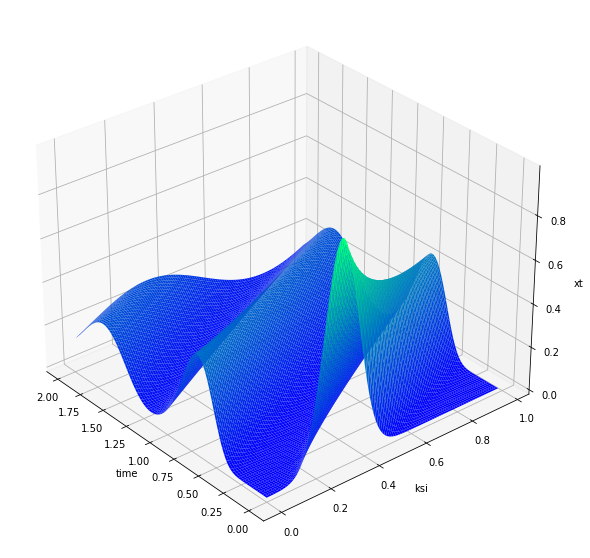

In [10]:
x = t
y = ksi_j
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, xt, rstride=1, cstride=1, cmap='winter', edgecolor='none', lw=1.8)
ax.set_xlabel('time')
ax.set_ylabel('ksi')
ax.set_zlabel('xt')
ax.invert_xaxis()

ax.view_init(azim=320)

iii

In [11]:
H = np.zeros((n,n))
k = 20

for i in range(n):
    if n/k*(i+1) <=100:
        j = int(n/k*(i+1)-1)
        H[i][j]=1

In [22]:
x0 = np.zeros(n)
z = np.identity(n)
ksi_j = np.zeros(n)
t = np.zeros(25)

for j in range(n):
    ksi_j[j] = j*h
    x0[j] = np.exp(-(ksi_j[j]-0.3)**2 / 0.01)
    
for j in range(25):
    t[j] = 0.02 + j * 0.02
    z[:,j] = np.dot(H, np.dot(expm(B*t[j]), x0))

In [23]:
z

array([[8.16154501e-04, 5.78375917e-04, 4.09752836e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.97824533e-03, 5.44836371e-03, 3.72608956e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.97675114e-02, 3.36605197e-02, 2.28567082e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])